In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train,test], ignore_index=True)

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df.columns = df.columns.str.lower()
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [24]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wooddecksf'

In [10]:
pd.set_option("display.max_rows", None)

In [11]:
df.isnull().any()

id               False
mssubclass       False
mszoning          True
lotfrontage       True
lotarea          False
street           False
alley             True
lotshape         False
landcontour      False
utilities         True
lotconfig        False
landslope        False
neighborhood     False
condition1       False
condition2       False
bldgtype         False
housestyle       False
overallqual      False
overallcond      False
yearbuilt        False
yearremodadd     False
roofstyle        False
roofmatl         False
exterior1st       True
exterior2nd       True
masvnrtype        True
masvnrarea        True
exterqual        False
extercond        False
foundation       False
bsmtqual          True
bsmtcond          True
bsmtexposure      True
bsmtfintype1      True
bsmtfinsf1        True
bsmtfintype2      True
bsmtfinsf2        True
bsmtunfsf         True
totalbsmtsf       True
heating          False
heatingqc        False
centralair       False
electrical        True
1stflrsf   

In [12]:
df['lotfrontage'] = df['lotfrontage'].fillna(df['lotfrontage'].mean())
df['bsmtcond']= df['bsmtcond'].fillna(df['bsmtcond'].mode()[0])
df['bsmtqual']= df['bsmtqual'].fillna(df['bsmtqual'].mode()[0])
df['fireplacequ']= df['fireplacequ'].fillna(df['fireplacequ'].mode()[0])
df['garagetype']= df['garagetype'].fillna(df['garagetype'].mode()[0])
df['garagefinish']= df['garagefinish'].fillna(df['garagefinish'].mode()[0])
df['garagequal']= df['garagequal'].fillna(df['garagequal'].mode()[0])
df['garagecond']= df['garagecond'].fillna(df['garagecond'].mode()[0])
df['mszoning']= df['mszoning'].fillna(df['mszoning'].mode()[0])

In [13]:
df['exterior1st']= df['exterior1st'].fillna(df['exterior1st'].mode()[0])
df['exterior2nd']= df['exterior2nd'].fillna(df['exterior2nd'].mode()[0])
df['saleprice']= df['saleprice'].fillna(df['saleprice'].mean())
df['masvnrarea']= df['masvnrarea'].fillna(df['masvnrarea'].mode()[0])
df['masvnrtype']= df['masvnrtype'].fillna(df['masvnrtype'].mode()[0])
df['bsmtexposure']= df['bsmtexposure'].fillna(df['bsmtexposure'].mode()[0])
df['bsmtfintype1']= df['bsmtfintype1'].fillna(df['bsmtfintype1'].mode()[0])
df['bsmtfintype2']= df['bsmtfintype2'].fillna(df['bsmtfintype2'].mode()[0])
df['bsmtfinsf1']= df['bsmtfinsf1'].fillna(df['bsmtfinsf1'].mean())
df['bsmtfinsf2']= df['bsmtfinsf2'].fillna(df['bsmtfinsf2'].mean())
df['bsmtunfsf']= df['bsmtunfsf'].fillna(df['bsmtunfsf'].mean())
df['totalbsmtsf']= df['totalbsmtsf'].fillna(df['totalbsmtsf'].mean())
df['garagearea']= df['garagearea'].fillna(df['garagearea'].mean())
df['garagecars']= df['garagecars'].fillna(df['garagecars'].mean())

In [14]:
df.drop(['garageyrblt','poolqc','fence','miscfeature'], axis=1, inplace=True)

In [16]:
df.drop(['source'], axis=1, inplace=True)

In [17]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


<AxesSubplot:xlabel='saleprice', ylabel='Density'>

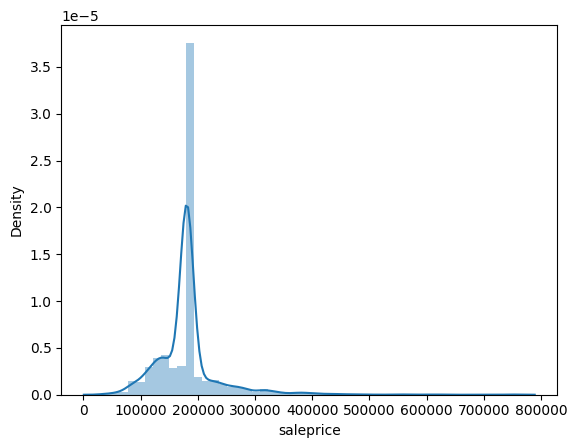

In [19]:
sns.distplot(df['saleprice'])

In [21]:
print("Skewness: %f" % df['saleprice'].skew())
print("Kurtosis: %f" % df['saleprice'].kurt())

Skewness: 2.660964
Kurtosis: 16.042632


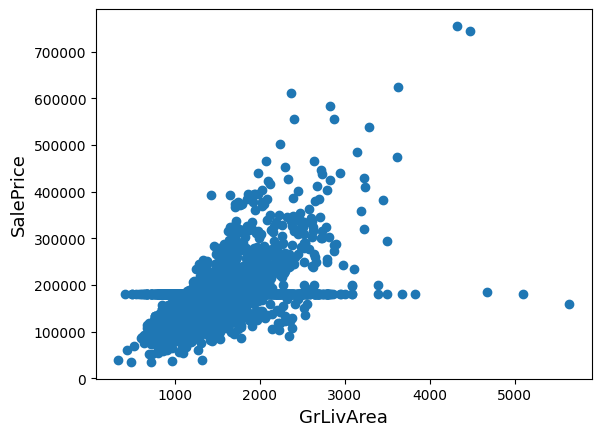

In [25]:
fig, ax = plt.subplots()
ax.scatter(x = df['grlivarea'], y = df['saleprice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

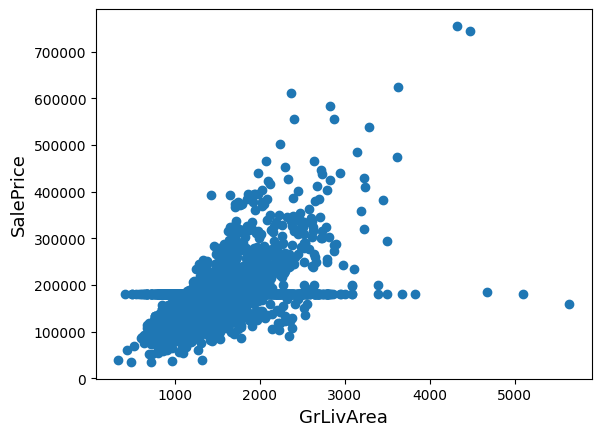

In [26]:
dftrain = df.drop(df[(df['grlivarea']>4000) & (df['saleprice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['grlivarea'], df['saleprice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180921.20 and sigma = 56164.71



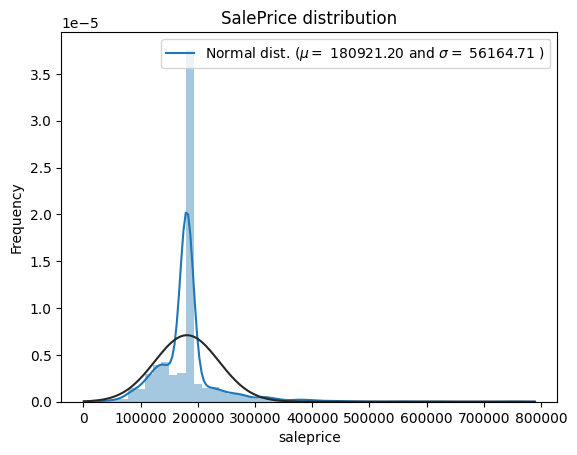

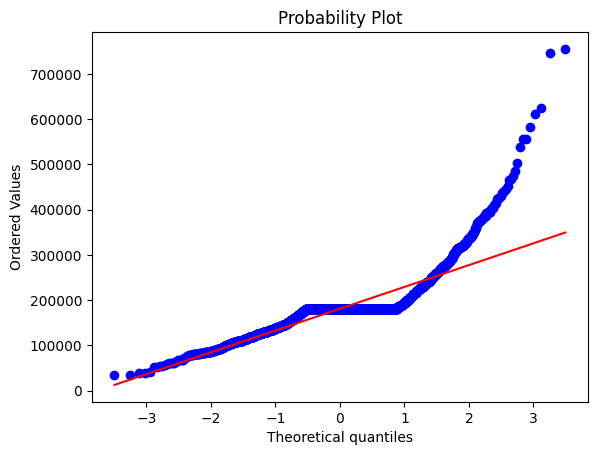

In [27]:
sns.distplot(df['saleprice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['saleprice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['saleprice'], plot=plt)
plt.show()


 mu = 12.06 and sigma = 0.29



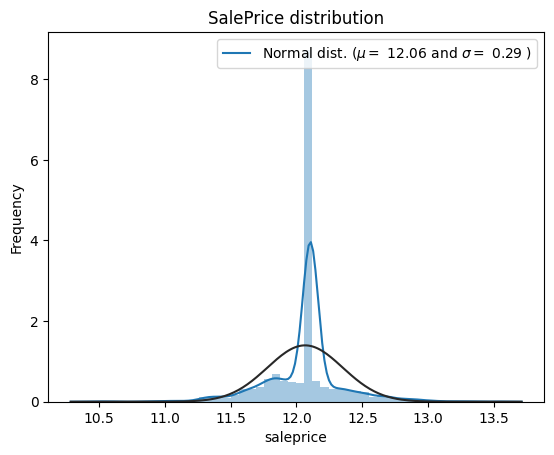

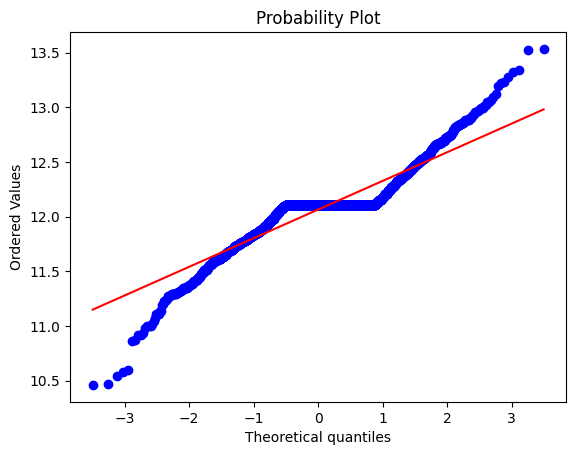

In [28]:
df['saleprice'] = np.log1p(df["saleprice"])

#Check the new distribution 
sns.distplot(df['saleprice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['saleprice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['saleprice'], plot=plt)
plt.show()

<AxesSubplot:>

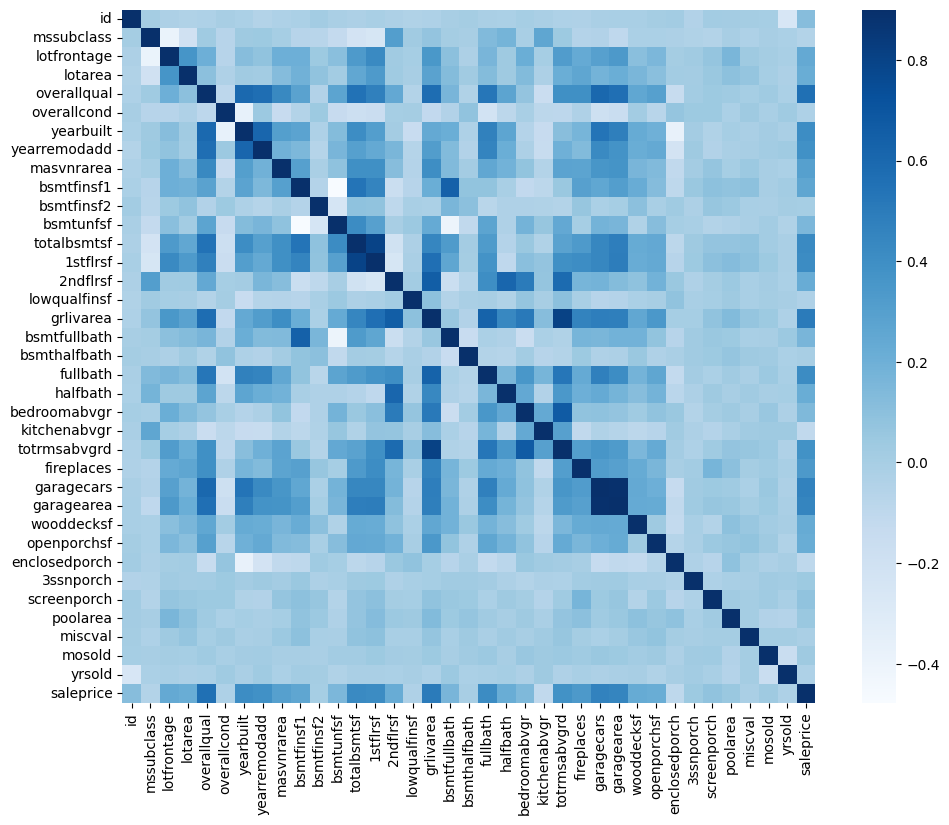

In [34]:
corr = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True,cmap='Blues')

In [35]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [36]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=20)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [37]:
df_full_train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
2452,2453,20,RM,52.0,8626,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,12.105822
463,464,70,RL,74.0,11988,Pave,NaN,IR1,HLS,AllPub,...,0,0,0,0,0,8,2008,WD,Normal,12.147919
1705,1706,20,RL,85.0,11128,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,10,2009,WD,Normal,12.105822
2061,2062,20,RL,75.0,10425,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2008,WD,Normal,12.105822
226,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2007,WD,Abnorml,12.577640


In [38]:
y_train = df_train.saleprice
y_val = df_val.saleprice
y_test = df_test.saleprice

In [39]:
del df_train['saleprice']
del df_val['saleprice']
del df_test['saleprice']

In [40]:
lin = LinearRegression()
rigde = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [41]:
def rsqr_score(test, pred):

    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):


    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_
def print_score(test, pred, model):


    print(f"- Regressor: {model}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [48]:
lin.fit(xtrain,ytrain)

ValueError: could not convert string to float: 'RL'

In [45]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(df_train, y_train, test_size= 0.3, random_state=42)

In [47]:
lin_scores = -1 * cross_val_score(lin, xtrain,ytrain,cv=5)
print("MSE scores (Linear Model):\n", lin_scores)
print("Mean MSE scores:", lin_scores.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gh611680\Anaconda3\envs\DSdigi\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gh611680\Anaconda3\envs\DSdigi\lib\site-packages\sklearn\linear_model\_base.py", line 684, in fit
    X, y = self._validate_data(
  File "C:\Users\gh611680\Anaconda3\envs\DSdigi\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\gh611680\Anaconda3\envs\DSdigi\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\gh611680\Anaconda3\envs\DSdigi\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "C:\Users\gh611680\Anaconda3\envs\DSdigi\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'RL'
